# <font color='red'><ins>Práctica 2 FAA - Vecinos próximos & Regresión Logística</ins></font>
## Alejandro Santorum Varela - alejandro.santorum@estudiante.uam.es
## José Manuel Chacón Aguilera - josem.chacon@estudiante.uam.es

In [9]:
%load_ext autoreload
%autoreload 2

In [10]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages')

In [11]:
# My modules
from Datos import Datos
import EstrategiaParticionado
import Clasificador

# External modules
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Important to pre-install tabulate (pip install tabulate)
from tabulate import tabulate

# Init class Classifier
clasificador = Clasificador.Clasificador()

In [7]:
db_pid = Datos('../ConjuntosDatos/pima-indians-diabetes.data')
n1,m1 = db_pid.datos.shape
print("Numero de ejemplos:", n1,"| Numero de columnas:", m1)
print(db_pid.nominalAtributos)

Numero de ejemplos: 768 | Numero de columnas: 9
[False, False, False, False, False, False, False, False, True]


In [8]:
db_wdbc = Datos('../ConjuntosDatos/wdbc.data')
n2,m2 = db_wdbc.datos.shape
print("Numero de ejemplos:", n2,"| Numero de columnas:", m2)
print(db_wdbc.nominalAtributos)

Numero de ejemplos: 569 | Numero de columnas: 31
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True]


## Normalización

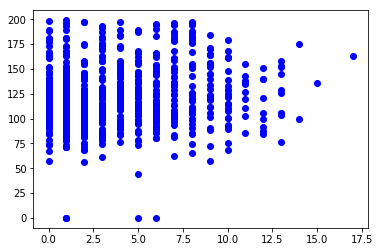

In [9]:
data = db_pid.datos
plt.plot(data[:,0], data[:,1], 'bo')

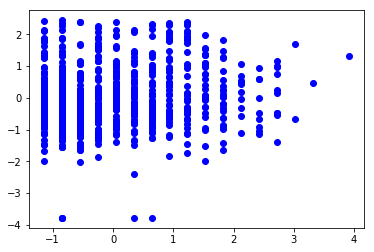

In [10]:
db_pid.normalizarDatos(db_pid.datos, db_pid.nominalAtributos)
data = db_pid.datos
plt.plot(data[:,0], data[:,1], 'bo')

Vamos a ver que la normalización es correcta

In [11]:
from sklearn import preprocessing

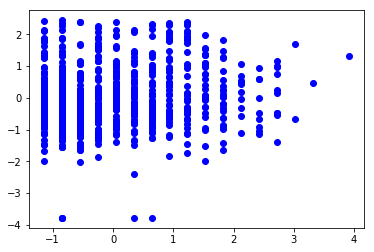

In [12]:
db_pid2 = Datos('../ConjuntosDatos/pima-indians-diabetes.data')

X_norm = preprocessing.scale(db_pid2.datos[:,:-1])

plt.plot(X_norm[:,0], X_norm[:,1], 'bo')

Vemos que las dos gráficas coinciden, indicándonos que, al menos para estos dos atributos, hemos normalizado correctamente

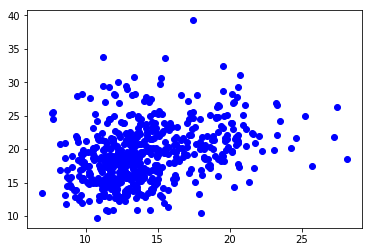

In [13]:
data = db_wdbc.datos
plt.plot(data[:,0], data[:,1], 'bo')

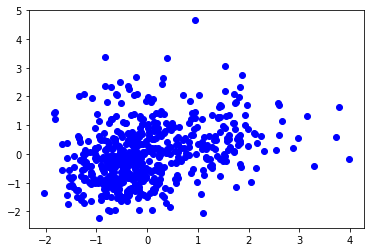

In [14]:
db_wdbc.normalizarDatos(db_wdbc.datos, db_wdbc.nominalAtributos)
data = db_wdbc.datos
plt.plot(data[:,0], data[:,1], 'bo')

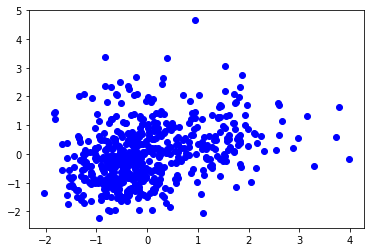

In [15]:
db_wdbc2 = Datos('../ConjuntosDatos/wdbc.data')

X_norm = preprocessing.scale(db_wdbc.datos[:,:-1])

plt.plot(X_norm[:,0], X_norm[:,1], 'bo')

De nuevo, las dos gráficas son iguales (la primera usando nuestras funciones de normalización y la segunda usando los métodos de sklearn). Ya estamos mucho más seguros de que nuestros métodos están bien implementados.

## Vecinos próximos

In [16]:
db_pid = Datos('../ConjuntosDatos/pima-indians-diabetes.data', normalize=True)
ndata, ncols = db_pid.datos.shape
print(ndata, ncols)

768 9


In [17]:
KNN = Clasificador.ClasificadorVecinosProximos(K=5, dist='euclidean')

In [18]:
strat_simple = EstrategiaParticionado.ValidacionSimple(0.8)

In [19]:
errores = clasificador.validacion(strat_simple, db_pid, KNN)
print(errores)

[0.30519480519480524]


In [20]:
KNNSK = Clasificador.ClasificadorVecinosProximosSK(K=5, dist='euclidean')

In [21]:
errores = clasificador.validacion(strat_simple, db_pid, KNNSK)
print(errores)

[0.27922077922077926]


In [22]:
db_wdbc = Datos('../ConjuntosDatos/wdbc.data', normalize=True)
ndata, ncols = db_wdbc.datos.shape
print(ndata, ncols)

569 31


In [23]:
errores = clasificador.validacion(strat_simple, db_wdbc, KNN)
print(errores)

[0.02631578947368418]


In [24]:
errores = clasificador.validacion(strat_simple, db_wdbc, KNNSK)
print(errores)

[0.03508771929824561]


## Regresión Logística

In [70]:
db_pid = Datos('../ConjuntosDatos/pima-indians-diabetes.data', normalize=True)
ndata, ncols = db_pid.datos.shape
print(ndata, ncols)

768 9


In [85]:
RL = Clasificador.ClasificadorRegresionLogistica(learning_rate=0.5, nepochs=110)

In [86]:
errores = clasificador.validacion(strat_simple, db_pid, RL)
print(errores)

[0.2727272727272727]


In [87]:
RL.W

array([-0.42988504,  0.45718747,  2.25871354, -0.04090096, -0.62269832,
       -1.35585374,  1.37867623,  1.29336895,  1.53931028])

In [92]:
RL_SKLR = Clasificador.ClasificadorRegresionLogisticaSK(learning_rate=0.5, sgd=False)

In [93]:
errores = clasificador.validacion(strat_simple, db_pid, RL_SKLR)
print(errores)

[0.23376623376623373]


In [104]:
RL_SKSGD = Clasificador.ClasificadorRegresionLogisticaSK(learning_rate=0.5, sgd=True)

In [105]:
errores = clasificador.validacion(strat_simple, db_pid, RL_SKSGD)
print(errores)

[0.2597402597402597]


In [65]:
db_wdbc = Datos('../ConjuntosDatos/wdbc.data', normalize=True)
ndata, ncols = db_wdbc.datos.shape
print(ndata, ncols)

569 31


In [66]:
errores = clasificador.validacion(strat_simple, db_wdbc, RL)
print(errores)

[0.02631578947368418]


In [120]:
errores = clasificador.validacion(strat_simple, db_wdbc, RL_SKLR)
print(errores)

[0.03508771929824561]


In [121]:
errores = clasificador.validacion(strat_simple, db_wdbc, RL_SKSGD)
print(errores)

[0.02631578947368418]


# <font color='red'>4. Análisis ROC </font>

In [3]:
def create_confMatrix(pred, real):
    i = 0
    tp, fp, tn, fn = 0, 0, 0, 0
    
    for pred_val in pred:
        # True negative
        if pred_val==0 and pred_val==real[i]:
            tn += 1
        # False negative
        elif pred_val==0 and pred_val!=real[i]:
            fn += 1
        # True positive
        elif pred_val==1 and pred_val==real[i]:
            tp += 1
        # False positive
        elif pred_val==1 and pred_val!=real[i]:
            fp += 1
        i += 1
    
    return [['PRED POS', tp, fp], ['PRED NEG', fn, tn]]




def print_confMatrix(m):
    headers = ["", "REAL POS", "REAL NEG"]
    print(tabulate(m, headers, tablefmt="grid")) 

In [6]:
def ROC_Analysis(dataset, clf, particionado, print_confMtx=True):
    seed = random.seed(0)
    np.random.shuffle(dataset.datos)
    particionado.creaParticiones(dataset.datos, seed)
    
    TPRs = [] # True positive ratios
    FPRs = [] # False positive ratios
    for particion in particionado.particiones:

        datostrain = dataset.datos[particion.indicesTrain, :]
        datostest = dataset.datos[particion.indicesTest, :]
            
        clf.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)
            
        pred = clf.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)
        real = datostest[:,-1] 
        
        # Creating confusion matrix, calculating TPR and FPR.
        m = create_confMatrix(pred, real)
        tpr_aux = m[0][1]/(m[0][1] + m[1][1])
        fpr_aux = m[0][2]/(m[0][2] + m[1][2])
        TPRs.append(tpr_aux)
        FPRs.append(fpr_aux)
    
    # Calculating TPRs and FPRs mean
    tpr = np.mean(TPRs)
    fpr = np.mean(FPRs)
    
    # Printing confusion matrix (if we want to)
    if print_confMtx:
        print_confMatrix(m)
        print("Punto espacio ROC: (", fpr, ",", tpr, ")")

    return fpr, tpr
 

In [23]:
def plot_ROC(fpr, tpr, clf_name=None, dataset_name=None):
    plt.figure()
    
    rand_bins = np.linspace(0, 1, num=30)
    plt.plot(rand_bins, rand_bins, color='blue', linestyle='dashed', label='random clf')
    
    tpr_coords = [0, tpr, 1]
    fpr_coords = [0, fpr, 1]
    plt.plot(fpr_coords, tpr_coords, color='red', label='classifier')
    
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc='lower right')
    if clf_name:
        plt.title('ROC space for '+clf_name)
    if dataset_name:
        plt.suptitle('Dataset used: '+dataset_name)
    else:
        plt.title('ROC space')

## <font color='blue'> 4.1 Dataset pima-indians-diabetes </font>

In [13]:
db_pid = Datos('../ConjuntosDatos/pima-indians-diabetes.data')
db_pid_sk = Datos('../ConjuntosDatos/pima-indians-diabetes.data')

np.random.shuffle(db_pid.datos)
np.random.shuffle(db_pid_sk.datos)

KNN_eucl = Clasificador.ClasificadorVecinosProximos(K=5, dist='euclidean')
KNNSK = Clasificador.ClasificadorVecinosProximosSK(K=5, dist='euclidean')

In [15]:
strat_simple = EstrategiaParticionado.ValidacionSimple(0.8)

In [16]:
fpr_nb, tpr_nb = ROC_Analysis(db_pid, KNN_eucl, strat_simple)

+----------+------------+------------+
|          |   REAL POS |   REAL NEG |
+==========+============+============+
| PRED POS |         30 |         18 |
+----------+------------+------------+
| PRED NEG |         23 |         83 |
+----------+------------+------------+
Punto espacio ROC: ( 0.1782178217821782 , 0.5660377358490566 )


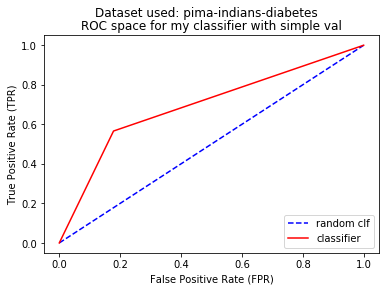

In [24]:
plot_ROC(fpr_nb, tpr_nb, clf_name='my classifier with simple val', dataset_name='pima-indians-diabetes')